# Modelling the strength of high-performance concrete using regression model and hyperparameter tuning

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn import metrics
from math import sqrt

from IPython.display import Image  
from sklearn import tree
import pydotplus

import warnings
warnings.filterwarnings('ignore')

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 2. Read file

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
print(df.shape)
print(df.dtypes)

(1030, 9)
cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


### Observations:

# 3. Exploratory Data Analysis

## 3.1. Get Statistics

In [4]:
df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

## 3.2 Univariate plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002960500C160>,
      dtype=object)

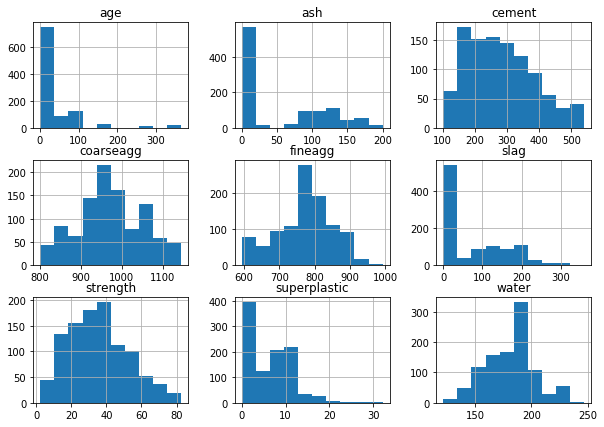

In [5]:
df.hist(figsize=(10,7))

### Observations:

## 3.3 Pair plot

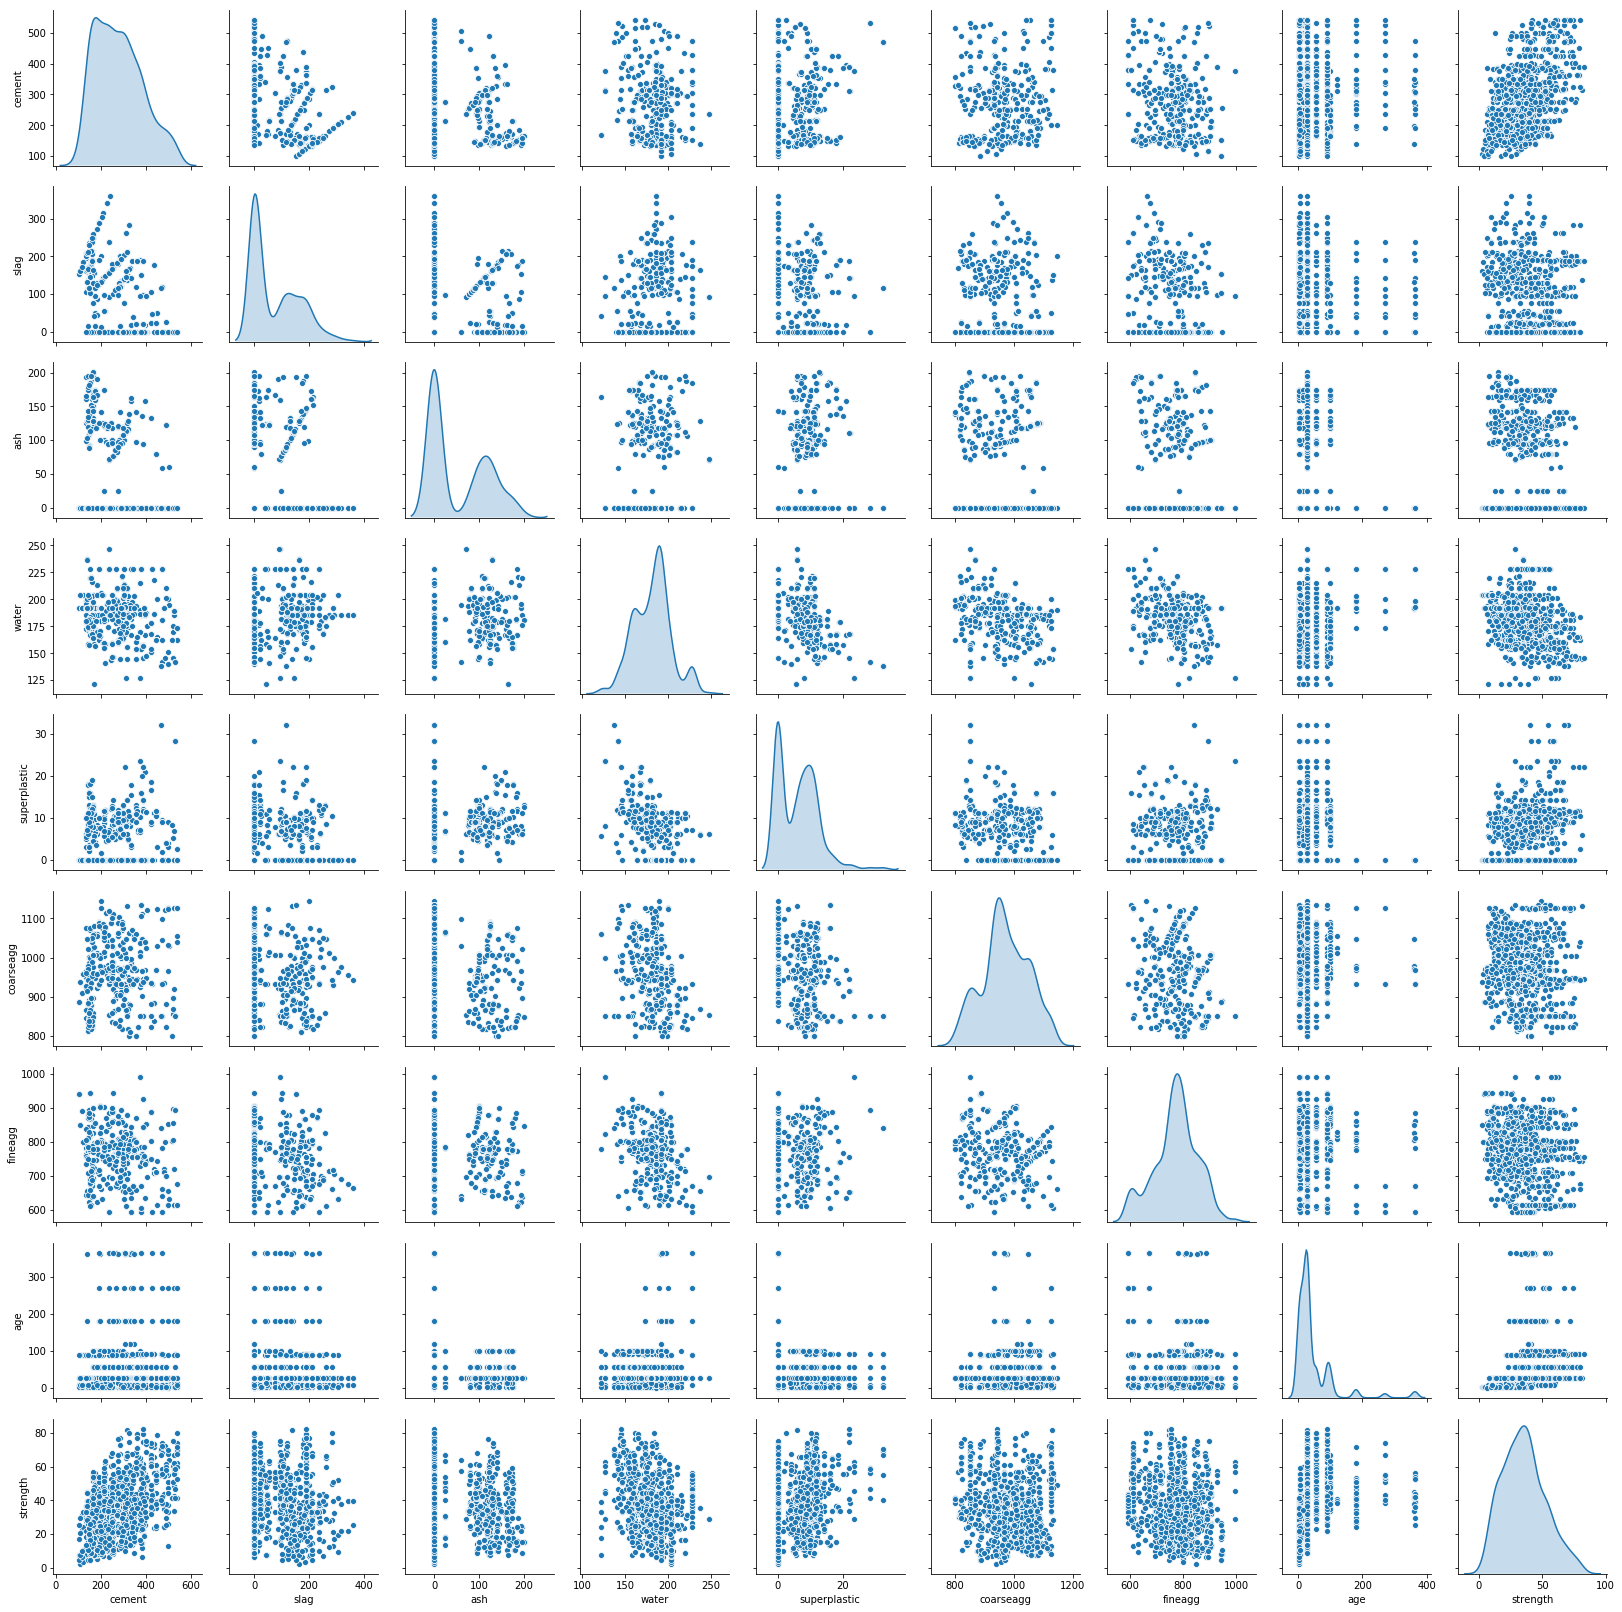

In [6]:
sns.pairplot(df, diag_kind='kde')

### Observations:

In [7]:
corr=df.corr()
corr

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

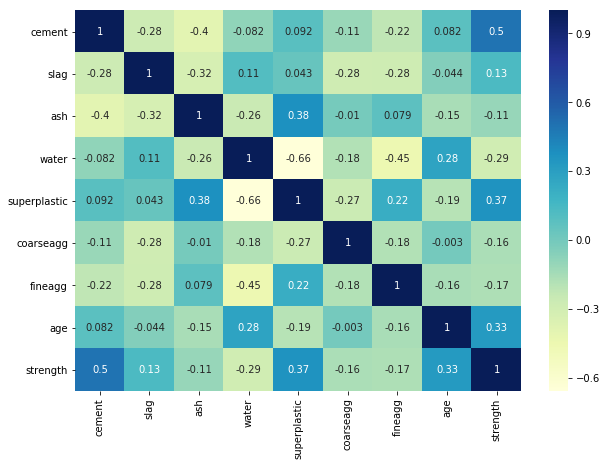

In [8]:
plt.figure(figsize=(10,7))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='YlGnBu', annot=True)

### Observations:

## 3.4. Bivariate Plots

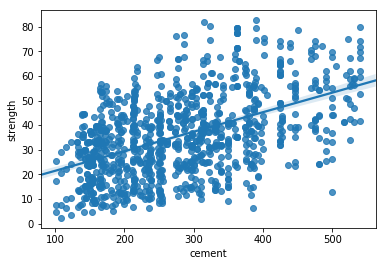

In [9]:
# Bivariate plot showing positive correlation between strength and cement
sns.regplot(data = df, x = 'cement', y = 'strength')

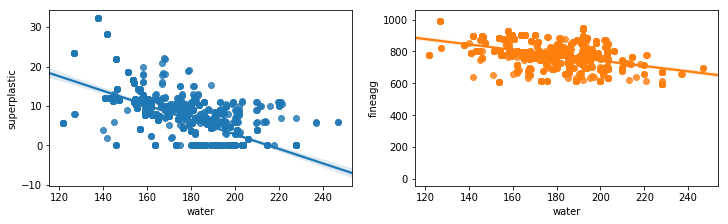

In [10]:
# Bivariate plots showing negative correlation between water & superplastic and water & fineagg

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (10,3), constrained_layout=True)
sns.regplot(data=df, x = 'water', y = 'superplastic', ax=axes[0])
sns.regplot(data=df, x ='water', y ='fineagg', ax=axes[1])



## 3.5 Handle Missing Values and Outliers

In [11]:
df.isna().apply(pd.value_counts)

cement  slag   ash  water  superplastic  coarseagg  fineagg   age  \
False    1030  1030  1030   1030          1030       1030     1030  1030   

       strength  
False      1030

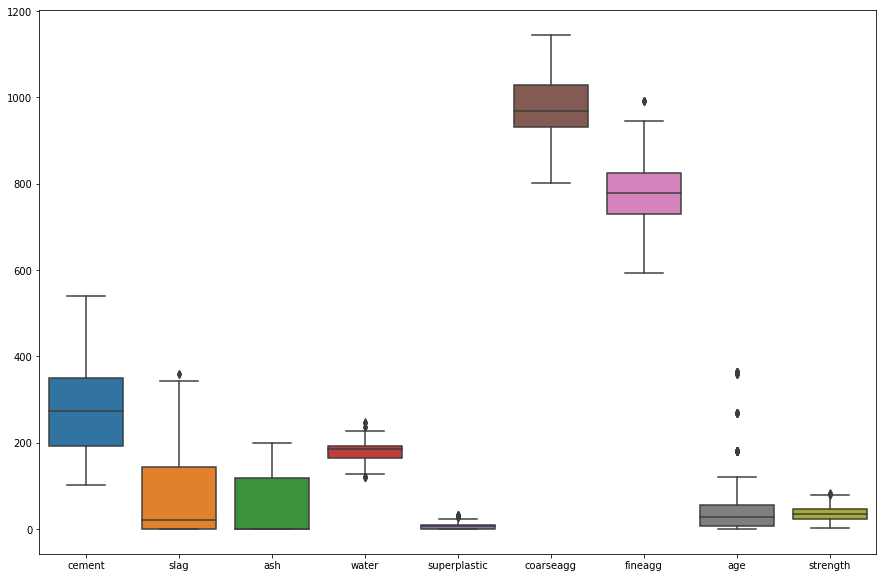

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

### Observations:

In [13]:
for col_name in df.columns[::]:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3-q1
    
    low = q1-1.5*IQR
    high = q3+1.5*IQR
    
    df.loc[(df[col_name]<low) | (df[col_name]>high), col_name]=df[col_name].median()
    

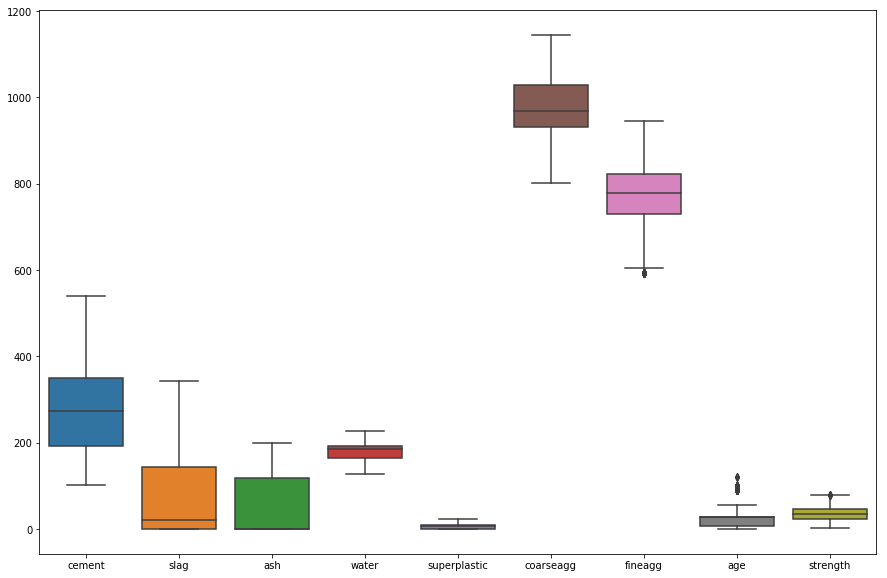

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

# 4. Feature Engineering

## 4.1. Create composite features

In [15]:
df['water/cement']=(df['water']/df['cement']).round(3)
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  water/cement  
0     29.89         1.440  
1     23.51         0.937  
2     29.22         0.750  
3     45.85         0.857  
4     18.29         1.249

In [16]:
df['coarseagg/fineagg']=(df['coarseagg']/df['fineagg']).round(3)
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  water/cement  coarseagg/fineagg  
0     29.89         1.440              1.298  
1     23.51         0.937              1.357  
2     29.22         0.750              1.111  
3     45.85         0.857              1.391  
4     18.29         1.249              1.503

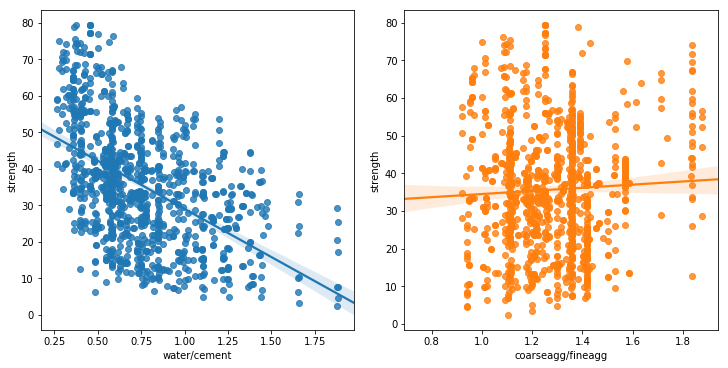

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (10,5), constrained_layout=True)
sns.regplot(data=df, x = 'water/cement', y = 'strength', ax=axes[0])
sns.regplot(data=df, x ='coarseagg/fineagg', y ='strength', ax=axes[1])

### Observations:

In [18]:
df.drop(['water', 'coarseagg/fineagg'], axis=1, inplace=True)
df.head()

cement   slag    ash  superplastic  coarseagg  fineagg   age  strength  \
0   141.3  212.0    0.0           0.0      971.8    748.5  28.0     29.89   
1   168.9   42.2  124.3          10.8     1080.8    796.2  14.0     23.51   
2   250.0    0.0   95.7           5.5      956.9    861.2  28.0     29.22   
3   266.0  114.0    0.0           0.0      932.0    670.0  28.0     45.85   
4   154.8  183.4    0.0           9.1     1047.4    696.7  28.0     18.29   

   water/cement  
0         1.440  
1         0.937  
2         0.750  
3         0.857  
4         1.249

In [19]:
df = df.reindex(columns=('cement', 'slag', 'ash', 'superplastic', 'coarseagg', 'fineagg', 'age',
        'water/cement', 'strength'))
df.head()

cement   slag    ash  superplastic  coarseagg  fineagg   age  water/cement  \
0   141.3  212.0    0.0           0.0      971.8    748.5  28.0         1.440   
1   168.9   42.2  124.3          10.8     1080.8    796.2  14.0         0.937   
2   250.0    0.0   95.7           5.5      956.9    861.2  28.0         0.750   
3   266.0  114.0    0.0           0.0      932.0    670.0  28.0         0.857   
4   154.8  183.4    0.0           9.1     1047.4    696.7  28.0         1.249   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

## 4.2. Model Complexity

## 4.3. Mixture of Gaussians

# 5. Creating a model

## 5.1. Decision Tree Model

In [20]:
X = df.drop('strength', axis=1)
y = df[['strength']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1030, 8)
(540, 8)
(309, 8)
(181, 8)


In [23]:
pipe = Pipeline([('scl', StandardScaler()), ('dtree', DecisionTreeRegressor(random_state=1))])

In [24]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'))])

In [25]:
print('Accuracy (Train Data): {0:0.2f}%'.format(pipe.score(X_train,y_train)*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(pipe.score(X_val, y_val)*100))
print('Accuracy (Test Data): {0:0.2f}%'.format(pipe.score(X_test, y_test)*100))

Accuracy (Train Data): 99.10%
Accuracy (Validation Set): 79.29%
Accuracy (Test Data): 83.71%


In [26]:
print(pd.DataFrame(pipe.named_steps['dtree'].feature_importances_, columns=['Imp'], index=X.columns))



                   Imp
cement        0.023387
slag          0.081712
ash           0.019891
superplastic  0.033250
coarseagg     0.035606
fineagg       0.031125
age           0.356461
water/cement  0.418569


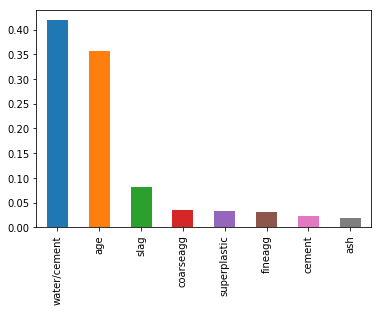

In [27]:
feature_imp = pd.Series(pipe.named_steps['dtree'].feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='bar')

### Observations:

In [28]:
# Create DOT data
dot_data = tree.export_graphviz(pipe.named_steps['dtree'], out_file=None, 
                                feature_names=list(X))  
                              
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [29]:
# Create PDF
graph.write_pdf("concrete.pdf")

# Create PNG
graph.write_png("concrete.png")

True

# 6. Model Tuning

In [30]:
X = df.drop(['cement','ash', 'superplastic', 'coarseagg', 'fineagg', 'strength'], axis=1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [32]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1030, 3)
(540, 3)
(309, 3)
(181, 3)


## 6.1 Decision Tree GridSearchCV

In [33]:
pipe_dtree = Pipeline([('scl', StandardScaler()), ('dtree2', DecisionTreeRegressor(random_state=1))])

param_grid_dtree = {'dtree2__criterion':['mse', 'mae'],
                     'dtree2__max_features':[2, 3],
                     'dtree2__max_depth':[5,6,7,8],
                     'dtree2__min_samples_split':[5,10,15],
                     'dtree2__min_samples_leaf':[3,5,10]}

grid_dtree = GridSearchCV(pipe_dtree, param_grid=param_grid_dtree, cv = 10)

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree2', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'dtree2__criterion': ['mse', 'mae'], 'dtree2__max_features': [2, 3], 'dtree2__max_depth': [5, 6, 7, 8], 'dtree2__min_samples_split': [5, 10, 15], 'dtree2__min_samples_leaf': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print('Best cross-validation score: {0:0.2f}%'.format(grid_dtree.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_dtree.score(X_val, y_val)*100))
print('Best parameters:', grid_dtree.best_params_)


Best cross-validation score: 75.99%
Accuracy (Validation Set): 79.88%
Best parameters: {'dtree2__criterion': 'mse', 'dtree2__max_depth': 7, 'dtree2__max_features': 3, 'dtree2__min_samples_leaf': 3, 'dtree2__min_samples_split': 10}


In [35]:
pred_dtree_grid=grid_dtree.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_dtree.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_dtree_grid))))

Accuracy(Test Set): 80.95%
RMSE score: 7.04


## Decision Tree RandomSearchCV

In [36]:
param_rand_dtree = {'dtree2__criterion':['mse', 'mae'],
                     'dtree2__max_features':sp_randint(1,3),
                     'dtree2__max_depth':sp_randint(2,8),
                     'dtree2__min_samples_split':sp_randint(2,11),
                     'dtree2__min_samples_leaf':sp_randint(1,11)}

rand_dtree = RandomizedSearchCV(pipe_dtree, param_distributions=param_rand_dtree, n_iter=100, cv = 10)

rand_dtree.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree2', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'dtree2__criterion': ['mse', 'mae'], 'dtree2__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960FB73278>, 'dtree2__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960FB73470>, 'dtree2__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960FB736D8>, 'dtree2__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen objec

In [37]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_dtree.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_dtree.score(X_val, y_val)*100))
print('Best parameters:', rand_dtree.best_params_)

Best cross-validation score: 74.13%
Accuracy (Validation Set): 79.88%
Best parameters: {'dtree2__criterion': 'mae', 'dtree2__max_depth': 7, 'dtree2__max_features': 2, 'dtree2__min_samples_leaf': 3, 'dtree2__min_samples_split': 6}


In [38]:
pred_dtree_rand=rand_dtree.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_dtree.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_dtree_rand))))

Accuracy(Test Set): 72.06%
RMSE score: 8.53


## 6.2 RandomForest GridSearchCV

In [39]:
pipe_forest = Pipeline([('scl', StandardScaler()), ('forest', RandomForestRegressor(random_state=1))])

param_grid_forest = {'forest__criterion':['mse', 'mae'],
                     'forest__n_estimators':[10, 20, 30],
                     'forest__max_features':[2, 3],
                     'forest__max_depth':[5,6,7],
                     'forest__min_samples_split':[5,10,20],
                     'forest__min_samples_leaf':[3,5,10]}

grid_forest = GridSearchCV(pipe_forest, param_grid=param_grid_forest, cv = 10)

grid_forest.fit(X_train, y_train)
                        

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spl...estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'forest__criterion': ['mse', 'mae'], 'forest__n_estimators': [10, 20, 30], 'forest__max_features': [2, 3], 'forest__max_depth': [5, 6, 7], 'forest__min_samples_split': [5, 10, 20], 'forest__min_samples_leaf': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_forest.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_forest.score(X_val, y_val)*100))
print('Best Parameters: ', grid_forest.best_params_)

Best Cross Validation score: 80.17%
Accuracy (Validation Set): 83.07%
Best Parameters:  {'forest__criterion': 'mse', 'forest__max_depth': 7, 'forest__max_features': 2, 'forest__min_samples_leaf': 3, 'forest__min_samples_split': 10, 'forest__n_estimators': 30}


In [41]:
pred_forest_grid=grid_forest.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_forest.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_forest_grid))))

Accuracy(Test Set): 83.11%
RMSE score: 6.63


## RandomForest RandomSearchCV

In [42]:
param_rand_forest = {'forest__criterion':['mse', 'mae'],
                     'forest__n_estimators':sp_randint(1,30),
                     'forest__max_features':[2, 3],
                     'forest__max_depth':sp_randint(2,8),
                     'forest__min_samples_split':sp_randint(2,15),
                     'forest__min_samples_leaf':sp_randint(1,11)}

rand_forest = RandomizedSearchCV(pipe_forest, param_distributions=param_rand_forest, n_iter= 100, cv = 10)

rand_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('forest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_spl...estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'forest__criterion': ['mse', 'mae'], 'forest__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296105202B0>, 'forest__max_features': [2, 3], 'forest__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029610520630>, 'forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029610520080>, 'forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen obje

In [43]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_forest.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_forest.score(X_val, y_val)*100))
print('Best parameters:', rand_forest.best_params_)

Best cross-validation score: 80.07%
Accuracy (Validation Set): 83.20%
Best parameters: {'forest__criterion': 'mae', 'forest__max_depth': 7, 'forest__max_features': 2, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 5, 'forest__n_estimators': 23}


In [44]:
pred_forest_rand=rand_forest.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_forest.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_forest_rand))))

Accuracy(Test Set): 82.71%
RMSE score: 6.71


## 6.4 Bagging Regressor GridSearchCV

In [45]:
pipe_bagg = Pipeline([('scl', StandardScaler()), ('bagg', BaggingRegressor(random_state=1))])

param_grid_bagg={'bagg__n_estimators': [20, 40, 60, 100],
                 'bagg__max_samples': [0.3, 0.5, 0.7, 1.0],
                 'bagg__max_features': [2, 3],
                 'bagg__bootstrap': [True, False],
                 'bagg__bootstrap_features': [True, False]}

grid_bagg = GridSearchCV(pipe_bagg, param_grid=param_grid_bagg, cv=10)

grid_bagg.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('bagg', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bagg__n_estimators': [20, 40, 60, 100], 'bagg__max_samples': [0.3, 0.5, 0.7, 1.0], 'bagg__max_features': [2, 3], 'bagg__bootstrap': [True, False], 'bagg__bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_bagg.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_bagg.score(X_val, y_val)*100))
print('Best parameters: ', grid_bagg.best_params_)

Best Cross Validation score: 80.92%
Accuracy (Validation Set): 84.74%
Best parameters:  {'bagg__bootstrap': False, 'bagg__bootstrap_features': False, 'bagg__max_features': 3, 'bagg__max_samples': 0.5, 'bagg__n_estimators': 60}


In [47]:
pred_bagg_grid=grid_bagg.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_bagg.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_bagg_grid))))

Accuracy(Test Set): 84.71%
RMSE score: 6.31


## Bagging Regressor RandomSearchCV

In [48]:
param_rand_bagg={'bagg__n_estimators': sp_randint(10,100),
                 'bagg__max_samples': uniform(0.1,0.9),
                 'bagg__max_features': [2, 3],
                 'bagg__bootstrap': [True, False],
                 'bagg__bootstrap_features': [True, False]}

rand_bagg = RandomizedSearchCV(pipe_bagg, param_distributions=param_rand_bagg, n_iter=100, cv=10)

rand_bagg.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('bagg', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'bagg__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960E724B38>, 'bagg__max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002961069D550>, 'bagg__max_features': [2, 3], 'bagg__bootstrap': [True, False], 'bagg__bootstrap_features': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [49]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_bagg.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_bagg.score(X_val, y_val)*100))
print('Best parameters:', rand_bagg.best_params_)

Best cross-validation score: 81.00%
Accuracy (Validation Set): 84.81%
Best parameters: {'bagg__bootstrap': False, 'bagg__bootstrap_features': False, 'bagg__max_features': 3, 'bagg__max_samples': 0.4452601383408463, 'bagg__n_estimators': 41}


In [50]:
pred_bagg_rand=rand_bagg.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_bagg.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_bagg_rand))))

Accuracy(Test Set): 84.98%
RMSE score: 6.25


## 6.5 AdaBoost Regressor GridSearchCV

In [51]:
pipe_ada = Pipeline([('scl', StandardScaler()), ('ada', AdaBoostRegressor(random_state=1))])

param_grid_ada={'ada__n_estimators':[20,40,60,100],
                'ada__learning_rate':[0.05,0.2,0.6,0.8,1.0],
                'ada__loss':['linear', 'square', 'exponential']}

grid_ada = GridSearchCV(pipe_ada, param_grid=param_grid_ada, cv=10 )

grid_ada.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ada', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=1))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ada__n_estimators': [20, 40, 60, 100], 'ada__learning_rate': [0.05, 0.2, 0.6, 0.8, 1.0], 'ada__loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_ada.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_ada.score(X_val, y_val)*100))
print('Best parameters: ', grid_ada.best_params_)

Best Cross Validation score: 72.10%
Accuracy (Validation Set): 73.79%
Best parameters:  {'ada__learning_rate': 0.6, 'ada__loss': 'square', 'ada__n_estimators': 60}


In [53]:
pred_ada_grid=grid_ada.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_ada.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_ada_grid))))

Accuracy(Test Set): 72.51%
RMSE score: 8.46


## AdaBoost Regressor RandomSearchCV

In [54]:
param_rand_ada={'ada__n_estimators':sp_randint(10,100),
                'ada__learning_rate':uniform(0.05,1.0),
                'ada__loss':['linear', 'square', 'exponential']}

rand_ada = RandomizedSearchCV(pipe_ada, param_distributions=param_rand_ada, n_iter = 100, cv=10 )

rand_ada.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ada', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=1))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'ada__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960F4442E8>, 'ada__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960F4441D0>, 'ada__loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [55]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_ada.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_ada.score(X_val, y_val)*100))
print('Best parameters:', rand_ada.best_params_)

Best cross-validation score: 72.68%
Accuracy (Validation Set): 72.38%
Best parameters: {'ada__learning_rate': 0.9621249855732351, 'ada__loss': 'square', 'ada__n_estimators': 35}


In [56]:
pred_ada_rand=rand_ada.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_ada.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_ada_rand))))

Accuracy(Test Set): 72.85%
RMSE score: 8.41


## 6.6 Gradient Boosting Regressor GridSearchCV

In [57]:
pipe_grad = Pipeline([('scl', StandardScaler()), ('grad', GradientBoostingRegressor(random_state=1))])

param_grid_grad = {'grad__n_estimators':[20,40,60,100],
                     'grad__learning_rate':[0.05,0.2,0.6,0.8,1.0],
                     'grad__max_features':[2, 3],
                     'grad__max_depth':[5,6,7],
                     'grad__min_samples_split':[5,10,20],
                     'grad__min_samples_leaf':[3,5,10]}

grid_grad = GridSearchCV(pipe_grad, param_grid=param_grid_grad, cv = 10)

grid_grad.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('grad', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
       ...tors=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'grad__n_estimators': [20, 40, 60, 100], 'grad__learning_rate': [0.05, 0.2, 0.6, 0.8, 1.0], 'grad__max_features': [2, 3], 'grad__max_depth': [5, 6, 7], 'grad__min_samples_split': [5, 10, 20], 'grad__min_samples_leaf': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_grad.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_grad.score(X_val, y_val)*100))
print('Best parameters: ', grid_grad.best_params_)

Best Cross Validation score: 83.53%
Accuracy (Validation Set): 82.62%
Best parameters:  {'grad__learning_rate': 0.2, 'grad__max_depth': 5, 'grad__max_features': 2, 'grad__min_samples_leaf': 3, 'grad__min_samples_split': 10, 'grad__n_estimators': 40}


In [59]:
pred_grad_grid=grid_grad.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_grad.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_grad_grid))))

Accuracy(Test Set): 85.53%
RMSE score: 6.14


## GradientBoosting RandomSearchCV

In [60]:
param_rand_grad = {'grad__n_estimators':sp_randint(10,100),
                     'grad__learning_rate':uniform(0.05,1.0),
                     'grad__max_features':[2, 3],
                     'grad__max_depth':sp_randint(2,8),
                     'grad__min_samples_split':sp_randint(2,15),
                     'grad__min_samples_leaf':sp_randint(1,11)}

rand_grad = RandomizedSearchCV(pipe_grad, param_distributions=param_rand_grad, n_iter=100, cv = 10)

rand_grad.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('grad', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
       ...tors=100, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'grad__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960E751208>, 'grad__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960E751DA0>, 'grad__max_features': [2, 3], 'grad__max_depth': <scipy.stats._distn_infrastructur...grad__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960E7514E0>},
          pre_dispatch='2*

In [61]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_grad.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_grad.score(X_val, y_val)*100))
print('Best parameters:', rand_grad.best_params_)

Best cross-validation score: 83.57%
Accuracy (Validation Set): 83.19%
Best parameters: {'grad__learning_rate': 0.22050675160118866, 'grad__max_depth': 5, 'grad__max_features': 2, 'grad__min_samples_leaf': 3, 'grad__min_samples_split': 6, 'grad__n_estimators': 33}


In [62]:
pred_grad_rand=rand_grad.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_grad.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_grad_rand))))

Accuracy(Test Set): 84.84%
RMSE score: 6.28


## 6.7 Linear Regression GridSearchCV

In [63]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('lr', LinearRegression())])

param_grid_lr={'lr__fit_intercept':[True,False],
                'lr__normalize':[True,False]}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=10 )

grid_lr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__fit_intercept': [True, False], 'lr__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_lr.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_lr.score(X_val, y_val)*100))
print('Best parameters: ', grid_lr.best_params_)

Best Cross Validation score: 58.13%
Accuracy (Validation Set): 63.70%
Best parameters:  {'lr__fit_intercept': True, 'lr__normalize': True}


In [65]:
pred_lr_grid=grid_lr.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_lr.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_lr_grid))))

Accuracy(Test Set): 66.24%
RMSE score: 9.38


## 6.8 Polynomial Regression GridSearchCV

In [66]:
pipe_poly = Pipeline([('poly', PolynomialFeatures()), ('scl', StandardScaler()), ('lr', LinearRegression())])

param_grid_poly={'poly__degree':[2,3,4],
                'lr__fit_intercept':[True,False],
                'lr__normalize':[True,False]}

grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid_poly, cv=10 )

grid_poly.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2, 3, 4], 'lr__fit_intercept': [True, False], 'lr__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_poly.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_poly.score(X_val, y_val)*100))
print('Best parameters: ', grid_poly.best_params_)

Best Cross Validation score: 75.99%
Accuracy (Validation Set): 75.82%
Best parameters:  {'lr__fit_intercept': True, 'lr__normalize': True, 'poly__degree': 3}


In [68]:
pred_poly_grid=grid_poly.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_poly.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_poly_grid))))

Accuracy(Test Set): 77.51%
RMSE score: 7.65


## Polynomial Regression RandomSearchCV

In [69]:
param_rand_poly={'poly__degree':sp_randint(2,5),
                'lr__fit_intercept':[True,False],
                'lr__normalize':[True,False]}

rand_poly = RandomizedSearchCV(pipe_poly, param_distributions=param_rand_poly, n_iter=100, cv=10 )

rand_poly.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'poly__degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002960E5F7898>, 'lr__fit_intercept': [True, False], 'lr__normalize': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [70]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_poly.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_poly.score(X_val, y_val)*100))
print('Best parameters:', rand_poly.best_params_)

Best cross-validation score: 75.99%
Accuracy (Validation Set): 75.82%
Best parameters: {'lr__fit_intercept': True, 'lr__normalize': True, 'poly__degree': 3}


In [71]:
pred_poly_rand=rand_poly.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_poly.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_poly_rand))))

Accuracy(Test Set): 77.51%
RMSE score: 7.65


## 6.9 KNN Regressor GridSearchCV

In [72]:
pipe_knn = Pipeline([('scl', StandardScaler()), ('knn', KNeighborsRegressor())])

param_grid_knn={'knn__n_neighbors':[4,5,6,7,8,9,10],
                'knn__leaf_size':[2,3,5],
                'knn__weights':['uniform','distance'],
                'knn__algorithm':['auto','ball_tree','kd_tree','brute']}

grid_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=10 )

grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': [4, 5, 6, 7, 8, 9, 10], 'knn__leaf_size': [2, 3, 5], 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
print('Best Cross Validation score: {0:0.2f}%'.format(grid_knn.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(grid_knn.score(X_val, y_val)*100))
print('Best parameters: ', grid_knn.best_params_)

Best Cross Validation score: 79.36%
Accuracy (Validation Set): 79.07%
Best parameters:  {'knn__algorithm': 'auto', 'knn__leaf_size': 5, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [74]:
pred_knn_grid=grid_poly.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(grid_knn.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_knn_grid))))

Accuracy(Test Set): 81.64%
RMSE score: 7.65


## KNN Regressor RandomSearchCV

In [75]:
param_rand_knn={'knn__n_neighbors':sp_randint(2,10),
                'knn__leaf_size':sp_randint(1,5),
                'knn__weights':['uniform','distance'],
                'knn__algorithm':['auto','ball_tree','kd_tree','brute']}

rand_knn = RandomizedSearchCV(pipe_knn, param_distributions=param_rand_knn, n_iter=100, cv=10 )

rand_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000296105455F8>, 'knn__leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029610545390>, 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [76]:
print('Best cross-validation score: {0:0.2f}%'.format(rand_knn.best_score_*100))
print('Accuracy (Validation Set): {0:0.2f}%'.format(rand_knn.score(X_val, y_val)*100))
print('Best parameters:', rand_knn.best_params_)

Best cross-validation score: 79.36%
Accuracy (Validation Set): 79.14%
Best parameters: {'knn__algorithm': 'auto', 'knn__leaf_size': 4, 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [77]:
pred_knn_rand=rand_knn.predict(X_test)
print('Accuracy(Test Set): {0:0.2f}%'.format(rand_knn.score(X_test,y_test)*100))
print('RMSE score: {0:0.2f}'.format(sqrt(metrics.mean_squared_error(y_test,pred_knn_rand))))

Accuracy(Test Set): 81.76%
RMSE score: 6.89


# 7.0 Results

## 7.1. Comparision of Model Accuracy

In [78]:
accuracy = pd.DataFrame({'GridSearchCV (%)':[66.24, 77.51, 81.64, 80.95, 83.11, 84.71, 72.51, 85.53],
                       'RandomSearchCV (%)':[66.24, 77.51, 81.76, 79.16, 83.30, 83.93, 74.16, 85.79]}, 
                       index=['Linear Regression','Polynomial (degree=3)', 'KNN','Decision Tree',
                              'Random Forest', 'Bagging', 'Ada Boost','Gradient Boost'])
accuracy

GridSearchCV (%)  RandomSearchCV (%)
Linear Regression                 66.24               66.24
Polynomial (degree=3)             77.51               77.51
KNN                               81.64               81.76
Decision Tree                     80.95               79.16
Random Forest                     83.11               83.30
Bagging                           84.71               83.93
Ada Boost                         72.51               74.16
Gradient Boost                    85.53               85.79

Text(0.5,0,'Accuracy(%)')

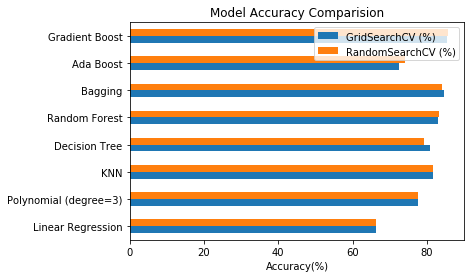

In [79]:
accuracy.plot(kind='barh')
plt.title('Model Accuracy Comparision')
plt.xlabel('Accuracy(%)')

## 7.2 Comparision of RMSE Scores

In [80]:
RMSE = pd.DataFrame({'GridSearchCV':[9.38, 7.65, 7.65, 7.04, 6.63, 6.31, 8.46, 6.14],
                       'RandomSearchCV':[9.38, 7.65, 6.89, 7.32, 6.59, 6.47, 8.20, 6.08]}, 
                       index=['Linear Regression','Polynomial (degree=3)', 'KNN','Decision Tree',
                              'Random Forest', 'Bagging', 'Ada Boost','Gradient Boost'])
RMSE

GridSearchCV  RandomSearchCV
Linear Regression              9.38            9.38
Polynomial (degree=3)          7.65            7.65
KNN                            7.65            6.89
Decision Tree                  7.04            7.32
Random Forest                  6.63            6.59
Bagging                        6.31            6.47
Ada Boost                      8.46            8.20
Gradient Boost                 6.14            6.08

Text(0.5,0,'RMSE')

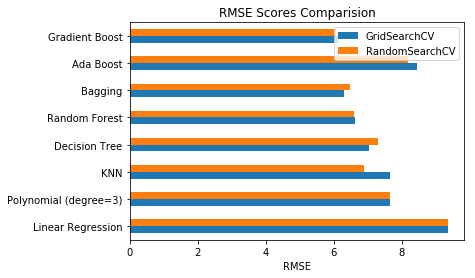

In [81]:
RMSE.plot(kind='barh')
plt.title('RMSE Scores Comparision')
plt.xlabel('RMSE')

### Conclusion: